## Template to get started with data exploration

The other notebooks show the results of existing analysis. Most of the resulting code has been moved from the notebooks to the associated python modules, in order to showcase the results. But that makes it harder to experiment with the data and come up with new analyses. This is particularly true because the current data structures that store the data are a little complicated. Maybe after we switch to xarrays in the future, we will no longer need this!

But for now, users can use this exploration template and plug in their code/analyses here. And finally, they can put the code into a module for re-use elsewhere

## Set up the dependencies

In [1]:
# for reading and validating data
import emeval.input.spec_details as eisd
import emeval.input.phone_view as eipv
import emeval.input.eval_view as eiev
from emeval.input.tabularize import tabularize_pv_map

In [2]:
# Visualization helpers
import emeval.viz.phone_view as ezpv
import emeval.viz.eval_view as ezev
import emeval.viz.geojson as ezgj

In [3]:
# For plots
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# For maps
import folium
import branca.element as bre

In [5]:
# For easier debugging while working on modules
import importlib

In [6]:
import arrow
from IPython.display import display

## The spec

The spec defines what experiments were done, and over which time ranges. Once the experiment is complete, most of the structure is read back from the data, but we use the spec to validate that it all worked correctly. The spec also contains the ground truth for the legs. Here, we read the spec for the trip to UC Berkeley.

In [7]:
AUTHOR_EMAIL = "shankari@eecs.berkeley.edu"

# If using ServerSpecDetails, data can alternatively be retrieved as such:
# DATASTORE_LOC = "http://localhost:8080"
# sd = eisd.ServerSpecDetails(DATASTORE_LOC, AUTHOR_EMAIL, "train_bus_ebike_mtv_ucb")

# You must run `cd bin/ && python dump_data_to_file.py --spec-id train_bus_ebike_mtv_ucb`
# before using this notebook!

DATASTORE_LOC = "bin/data/"
sd = eisd.FileSpecDetails(DATASTORE_LOC, AUTHOR_EMAIL, "train_bus_ebike_mtv_ucb")

After iterating over 1 entries, entry found
Found spec = Multimodal multi-train, multi-bus, ebike trip to UC Berkeley
Evaluation ran from 2019-07-16T00:00:00-07:00 -> 2020-04-30T00:00:00-07:00


## The views

There are two main views for the data - the phone view and the evaluation view. 

### Phone view

In the phone view, the phone is primary, and then there is a tree that you can traverse to get the data that you want. Traversing that tree typically involves nested for loops; here's an example of loading the phone view and traversing it. You can replace the print statements with real code. When you are ready to check this in, please move the function to one of the python modules so that we can invoke it more generally

In [8]:
pv = eipv.PhoneView(sd)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
Loading transitions for phone ucb-sdb-android-2
Loading transitions for phone ucb-sdb-android-3
Loading transitions for phone ucb-sdb-android-4
Reading data for ios phones
Loading transitions for phone ucb-sdb-ios-1
Loading transitions for phone ucb-sdb-ios-2
Loading transitions for phone ucb-sdb-ios-3
Loading transitions for phone ucb-sdb-ios-4
-------------------- About to fill calibration ranges --------------------
Processing data for android phones
Processing transitions for phone ucb-sdb-android-1
Filtered 102 total -> 0 calibration transitions 
Processing transitions for phone ucb-sdb-android-2
Filtered 90 total -> 0 calibration transitions 
Processing transitions for phone ucb-sdb-android-3
Filtered 90 total -> 0 calibration transitions 
Processing transitions for phone ucb-sdb-android-4
Filtered 90 total -> 0 calibratio

('berkeley_to_mtv_SF_express_bus_0', 11389.640381097794, <Arrow [2019-12-09T16:13:29.483522-08:00]>, <Arrow [2019-12-09T19:23:19.123903-08:00]>)
android: Copying ucb-sdb-android-2 accuracy trips to 3, before = 0
('mtv_to_berkeley_sf_bart_0', 9660.24267578125, <Arrow [2019-12-11T08:12:44.752437-08:00]>, <Arrow [2019-12-11T10:53:44.995113-08:00]>)
('walk_urban_university_0', 720.1987051963806, <Arrow [2019-12-11T14:08:58.567197-08:00]>, <Arrow [2019-12-11T14:20:58.765902-08:00]>)
('berkeley_to_mtv_SF_express_bus_0', 10919.513394117355, <Arrow [2019-12-11T16:18:33.636605-08:00]>, <Arrow [2019-12-11T19:20:33.149999-08:00]>)
android: Copying ucb-sdb-android-2 accuracy trips to 3, before = 0
('mtv_to_berkeley_sf_bart_0', 8122.254474878311, <Arrow [2020-02-06T08:14:46.468857-08:00]>, <Arrow [2020-02-06T10:30:08.723332-08:00]>)
('walk_urban_university_0', 829.4980051517487, <Arrow [2020-02-06T13:06:59.787174-08:00]>, <Arrow [2020-02-06T13:20:49.285179-08:00]>)
('berkeley_to_mtv_SF_express_bus_

('berkeley_to_mtv_SF_express_bus_0', 11588.745908975601, <Arrow [2019-09-10T16:09:30.117800-07:00]>, <Arrow [2019-09-10T19:22:38.863709-07:00]>)
ios: Copying ucb-sdb-ios-3 accuracy trips to 3, before = 0
('mtv_to_berkeley_sf_bart_0', 8728.208999156952, <Arrow [2019-09-11T08:12:17.541266-07:00]>, <Arrow [2019-09-11T10:37:45.750265-07:00]>)
('walk_urban_university_0', 728.3241000175476, <Arrow [2019-09-11T13:46:33.762365-07:00]>, <Arrow [2019-09-11T13:58:42.086465-07:00]>)
('berkeley_to_mtv_SF_express_bus_0', 12707.314440011978, <Arrow [2019-09-11T16:25:59.496105-07:00]>, <Arrow [2019-09-11T19:57:46.810545-07:00]>)
ios: Copying ucb-sdb-ios-3 accuracy trips to 3, before = 0
('mtv_to_berkeley_sf_bart_0', 9115.632758140564, <Arrow [2019-09-17T08:08:01.759346-07:00]>, <Arrow [2019-09-17T10:39:57.392104-07:00]>)
('walk_urban_university_0', 756.9605379104614, <Arrow [2019-09-17T13:45:59.444274-07:00]>, <Arrow [2019-09-17T13:58:36.404812-07:00]>)
('berkeley_to_mtv_SF_express_bus_0', 10960.88972

Processing data for ios phones
-------------------- About to fill in location information --------------------
Processing data for android phones
Processing data for ios phones
Processing data for android phones
Processing data for ios phones
-------------------- About to fill in motion activity information --------------------
Processing data for android phones
Processing data for ios phones
Processing data for android phones
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
mo

Filling label ucb-sdb-android-2 for OS android
Filling label ucb-sdb-android-3 for OS android
Filling label ucb-sdb-android-4 for OS android
Filling label ucb-sdb-ios-1 for OS ios
Filling label ucb-sdb-ios-2 for OS ios
Filling label ucb-sdb-ios-3 for OS ios
Filling label ucb-sdb-ios-4 for OS ios
-------------------- Done populating information from server --------------------


The `tabularize_pv_map` function in `emeval.input.tabularize` can be used to convert a phone view tree into a series of dataframes for more intuitive querying. The dataframes are organized by the operating systems of the test phones and the type of data they hold.

In [9]:
pv_dfs = tabularize_pv_map(pv.map())

In [10]:
for phone_os, df_map in pv_dfs.items():
    for df_label, df in df_map.items():
        print(f"{phone_os=}, {df_label=}")
        print(df.columns)

phone_os='android', df_label='battery_df'
Index(['android_health', 'android_plugged', 'android_technology',
       'android_temperature', 'android_voltage', 'battery_level_pct',
       'battery_status', 'ts', 'write_ts', 'hr', 'phone_label', 'role',
       'range_type', 'range_index', 'trip_id', 'trip_id_base', 'trip_run',
       'gt_start_ts', 'gt_end_ts', 'gt_duration', 'eval_common_trip_id',
       'eval_role', 'eval_role_base', 'eval_role_run', 'trip_range_id',
       'trip_range_id_base', 'trip_range_run', 'trip_range_gt_start_ts',
       'trip_range_gt_end_ts', 'trip_range_gt_duration', 'trip_range_index',
       'section_range_id', 'section_range_id_base', 'section_range_run',
       'section_range_gt_start_ts', 'section_range_gt_end_ts',
       'section_range_gt_duration', 'section_range_index'],
      dtype='object')
phone_os='android', df_label='location_df'
Index(['accuracy', 'altitude', 'bearing', 'elapsedRealtimeNanos', 'filter',
       'fmt_time', 'latitude', 'longitude',

### Eval view

In the eval view, the experiment is primary, and then there is a similar tree that you can traverse to get the data that you want. Traversing that tree typically involves nested for loops; here's an example of manipulating the eval view and traversing it. You can replace the print statements with real code. When you are ready to check this in, please move the function to one of the python modules so that we can invoke it more generally

In [11]:
ev = eiev.EvaluationView()
ev.from_view_eval_trips(pv, "", "")

Processing data for android phones
['accuracy_control_0', 'HAHFDC_0', 'HAMFDC_0', 'power_control_0']
Common trip id = mtv_to_berkeley_sf_bart_0
Common trip id = walk_urban_university_0
Common trip id = berkeley_to_mtv_SF_express_bus_0
['accuracy_control_1', 'HAHFDC_1', 'HAMFDC_1', 'power_control_1']
Common trip id = mtv_to_berkeley_sf_bart_0
Common trip id = walk_urban_university_0
Common trip id = berkeley_to_mtv_SF_express_bus_0
['accuracy_control_2', 'HAHFDC_2', 'HAMFDC_2', 'power_control_2']
Common trip id = mtv_to_berkeley_sf_bart_0
Common trip id = walk_urban_university_0
Common trip id = berkeley_to_mtv_SF_express_bus_0
['accuracy_control_0', 'HAHFDC_0', 'MAHFDC_0', 'power_control_0']
Common trip id = mtv_to_berkeley_sf_bart_0
Common trip id = walk_urban_university_0
Common trip id = berkeley_to_mtv_SF_express_bus_0
['accuracy_control_1', 'HAHFDC_1', 'MAHFDC_1', 'power_control_1']
Common trip id = mtv_to_berkeley_sf_bart_0
Common trip id = walk_urban_university_0
Common trip id 

We see these evaluation trips have labels such as `HAHFDC_0`, or `HAMFDC_0`. What do these mean?

`HA` or `MA` refer to high accuracy or medium accuracy, respectively. Trips with `HA` will tend to favor GPS utilization and result in high power consumption.

`HF` or `MF` refer to high frequency or medium accuracy, respectively. Trips with `HF` will sense and process more often, and are likely to have higher spatiotemporal accuracy (e.g. will hug corners more accurately), albeit with higher power consumption.

In [12]:
for phone_os, eval_map in ev.map("evaluation").items():
    print(15 * "=*")
    print(phone_os, eval_map.keys())
    for (curr_calibrate, curr_calibrate_trip_map) in eval_map.items():
        print(4 * ' ', 15 * "-*")
        print(4 * ' ', curr_calibrate, curr_calibrate_trip_map.keys())
        for trip_id, trip_map in curr_calibrate_trip_map.items():
            print(8 * ' ', 30 * "=")
            print(8 * ' ', trip_id, trip_map.keys())
            for run_label, tr in trip_map.items():
                print(12 * ' ', 30 * "=")
                print(12 * ' ', run_label, tr.keys())
                for sr in tr["evaluation_section_ranges"]:
                    print(16 * ' ', 30 * "~")
                    print(16 * ' ',sr["trip_id"], sr.keys())

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
android dict_keys(['HAHFDC v/s HAMFDC', 'HAHFDC v/s MAHFDC', 'MAMFDC v/s HAMFDC', 'MAMFDC v/s MAHFDC'])
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     HAHFDC v/s HAMFDC dict_keys(['mtv_to_berkeley_sf_bart_0', 'walk_urban_university_0', 'berkeley_to_mtv_SF_express_bus_0'])
         mtv_to_berkeley_sf_bart_0 dict_keys(['accuracy_control_0', 'HAHFDC_0', 'HAMFDC_0', 'power_control_0', 'accuracy_control_1', 'HAHFDC_1', 'HAMFDC_1', 'power_control_1', 'accuracy_control_2', 'HAHFDC_2', 'HAMFDC_2', 'power_control_2'])
             accuracy_control_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'evaluation_section_ranges', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 walk_to_caltrain_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
         

                 walk to the bikeshare location_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 ebike_bikeshare_urban_long_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 tt_ebike_bikeshare_urban_long_express_bus_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 wait_for_express_bus_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                 commuter_rail_with_tunnels_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 inner_suburb_downtown_walk_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
             HAHFDC_2 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'evaluation_section_ranges', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 walk to the bikeshare location_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 ebike_bikeshare_urban_long_0 dict_

                 wait_for_city_bus_short_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 city_bus_short_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 walk_end_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
             accuracy_control_1 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'evaluation_section_ranges', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 walk_to_caltrain_0 dict_keys(['trip_id', 'trip_id_base', 'tri

                 commuter_rail_aboveground_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 tt_commuter_rail_aboveground_subway_underground_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 wait_for_subway_underground_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 subway_underground_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                 commuter_rail_with_tunnels_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 inner_suburb_downtown_walk_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
             accuracy_control_1 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'evaluation_section_ranges', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 walk to the bikeshare location_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 ebike_bikeshare_urban_lo

                 wait_for_express_bus_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 express_bus_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 walk_downtown_urban_canyon_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 wait_for_light_rail_below_above_ground_0 dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'battery_df', 'location_df', 'motion_activity_df', 'transition_df'])
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 ligh

### Ground truth

The ground truth is stored in the spec, and we can retrieve it from there. Once we have retrieved the trip, there are many possible analyses using them. Please see `get_concat_trajectories` for an example.

We can confirm that there are valid timestamp (`ts`) values for each trip range:

In [13]:
for phone_os, df_map in pv_dfs.items():
    for df_label, df in df_map.items():
        print("-"*10, f"{phone_os=}, {df_label=}", "-"*10)
        if "trip_range_id" in df.columns:
            tr_ids = df["trip_range_id_base"].dropna().unique()
            for tr_id in tr_ids:
                tr_id_rows = df.query(f"trip_range_id_base == '{tr_id}'")[["trip_range_id_base", "trip_range_gt_start_ts", "trip_range_gt_end_ts"]].drop_duplicates()
                for _, _, gt_start_ts, gt_end_ts in (tr_id_rows.itertuples()):
                    assert not df.query(f"{gt_start_ts} < ts < {gt_end_ts}")["ts"].isnull().values.any()
        print("Has valid `ts` values for each trip range ✅ ")

---------- phone_os='android', df_label='battery_df' ----------
Has valid `ts` values for each trip range ✅ 
---------- phone_os='android', df_label='location_df' ----------
Has valid `ts` values for each trip range ✅ 
---------- phone_os='android', df_label='filtered_location_df' ----------
Has valid `ts` values for each trip range ✅ 
---------- phone_os='android', df_label='motion_activity_df' ----------
Has valid `ts` values for each trip range ✅ 
---------- phone_os='android', df_label='transition_df' ----------
Has valid `ts` values for each trip range ✅ 
---------- phone_os='ios', df_label='battery_df' ----------
Has valid `ts` values for each trip range ✅ 
---------- phone_os='ios', df_label='location_df' ----------
Has valid `ts` values for each trip range ✅ 
---------- phone_os='ios', df_label='filtered_location_df' ----------
Has valid `ts` values for each trip range ✅ 
---------- phone_os='ios', df_label='motion_activity_df' ----------
Has valid `ts` values for each trip ran

As well as each section range:

In [14]:
for phone_os, df_map in pv_dfs.items():
    for df_label, df in df_map.items():
        print("-"*10, f"{phone_os=}, {df_label=}", "-"*10)
        if "section_range_id" in df.columns:
            sr_ids = df["section_range_id_base"].dropna().unique()
            for sr_id in sr_ids:
                sr_id_rows = df.query(f"section_range_id_base == '{sr_id}'")[["section_range_id_base", "section_range_gt_start_ts", "section_range_gt_end_ts"]].drop_duplicates()
                for _, _, gt_start_ts, gt_end_ts in (sr_id_rows.itertuples()):
                    assert not df.query(f"{gt_start_ts} < ts < {gt_end_ts}")["ts"].isnull().values.any()
        print("Has valid `ts` values for each section range ✅ ")

---------- phone_os='android', df_label='battery_df' ----------
Has valid `ts` values for each section range ✅ 
---------- phone_os='android', df_label='location_df' ----------
Has valid `ts` values for each section range ✅ 
---------- phone_os='android', df_label='filtered_location_df' ----------
Has valid `ts` values for each section range ✅ 
---------- phone_os='android', df_label='motion_activity_df' ----------
Has valid `ts` values for each section range ✅ 
---------- phone_os='android', df_label='transition_df' ----------
Has valid `ts` values for each section range ✅ 
---------- phone_os='ios', df_label='battery_df' ----------
Has valid `ts` values for each section range ✅ 
---------- phone_os='ios', df_label='location_df' ----------
Has valid `ts` values for each section range ✅ 
---------- phone_os='ios', df_label='filtered_location_df' ----------
Has valid `ts` values for each section range ✅ 
---------- phone_os='ios', df_label='motion_activity_df' ----------
Has valid `ts` 

### For trips

Using the phone view dataframes:

In [15]:
tr_subset = ["trip_range_id_base", "trip_range_gt_start_ts", "trip_range_gt_end_ts"]
for phone_os, df_map in pv_dfs.items():
    for df_label, df in df_map.items():
        print("-"*10, f"{phone_os=}, {df_label=}", "-"*10)
        if "trip_range_id" in df.columns:
            tr_info = df[tr_subset].drop_duplicates().dropna()
            for _, tr_id_base, gt_start_ts, gt_end_ts in tr_info.itertuples():
                print(f"{tr_id_base=}, {gt_start_ts=}, {gt_end_ts=}")
                gt_trip = sd.get_ground_truth_for_trip(tr_id_base, gt_start_ts, gt_end_ts)
                print(eisd.SpecDetails.get_concat_trajectories(gt_trip)["properties"], end="\n\n")

---------- phone_os='android', df_label='battery_df' ----------
tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1563979902.185629, gt_end_ts=1563989197.702858
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='walk_urban_university', gt_start_ts=1564002736.706653, gt_end_ts=1564003534.7931042
{'modes': ['WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1564011427.662981, gt_end_ts=1564023559.661789
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1564067188.267119, gt_end_ts=1564075724.244487
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='walk_urban_university', gt_start_ts=1564088895.215784, gt_end_ts=1564089714.693573
{'modes': ['WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1564097591.145783, gt_end_ts=1564109968.351553
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING

{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1575908071.75604, gt_end_ts=1575916404.083811
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='walk_urban_university', gt_start_ts=1575928741.664712, gt_end_ts=1575929509.919419
{'modes': ['WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1575936809.483522, gt_end_ts=1575948199.123903
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1576080764.752437, gt_end_ts=1576090424.995113
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='walk_urban_university', gt_start_ts=1576102138.5671968, gt_end_ts=1576102858.765902
{'modes': ['WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1576109913.636605, gt_end_ts=1576120833.1499991
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1563979902.185629, gt_end_ts=1563989197.702858
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='walk_urban_university', gt_start_ts=1564002736.706653, gt_end_ts=1564003534.7931042
{'modes': ['WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1564011427.662981, gt_end_ts=1564023559.661789
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1564067188.267119, gt_end_ts=1564075724.244487
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='walk_urban_university', gt_start_ts=1564088895.215784, gt_end_ts=1564089714.693573
{'modes': ['WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1564097591.145783, gt_end_ts=1564109968.351553
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=156415387

### For sections

Same as above:

In [16]:
sr_subset = ["trip_range_id_base", "section_range_gt_start_ts", "section_range_gt_end_ts"]
for phone_os, df_map in pv_dfs.items():
    for df_label, df in df_map.items():
        print("-"*10, f"{phone_os=}, {df_label=}", "-"*10)
        if "section_range_id" in df.columns:
            sr_info = df[sr_subset].drop_duplicates().dropna()
            for _, tr_id_base, gt_start_ts, gt_end_ts in sr_info.itertuples():
                print(f"{tr_id_base=}, {gt_start_ts=}, {gt_end_ts=}")
                gt_trip = sd.get_ground_truth_for_trip(tr_id_base, gt_start_ts, gt_end_ts)
                print(eisd.SpecDetails.get_concat_trajectories(gt_trip)["properties"], end="\n\n")

---------- phone_os='android', df_label='battery_df' ----------
tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1563979902.260114, gt_end_ts=1563980934.763476
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1563980934.780724, gt_end_ts=1563982148.848342
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1563982148.860445, gt_end_ts=1563984650.761559
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1563984825.022, gt_end_ts=1563985155.011
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1563985155.021, gt_end_ts=1563988430.908957
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1563988430.924944, gt_end_ts=1563988713.883302
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']

{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568161879.054672, gt_end_ts=1568162654.625458
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568162861.774787, gt_end_ts=1568163677.226685
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568163677.2464828, gt_end_ts=1568163911.9928885
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568164574.933717, gt_end_ts=1568167455.228725
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568167455.247277, gt_end_ts=1568168558.845121
{'modes': ['WALKING', 'BICYCLING'

{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1574305391.492787, gt_end_ts=1574306491.9954991
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1575389710.013753, gt_end_ts=1575390557.797813
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1575390671.838859, gt_end_ts=1575393104.7474031
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1575393371.570674, gt_end_ts=1575393555.1622062
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1575393555.177682, gt_end_ts=1575396891.5672112
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1575397197.2696428, gt_end_ts=15

{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1564104305.72385, gt_end_ts=1564104469.733056
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1564104469.7508678, gt_end_ts=1564104765.724967
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1564104765.738415, gt_end_ts=1564108862.258852
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1564108862.2746139, gt_end_ts=1564109968.298394
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1564153874.896019, gt_end_ts=1564154665.101372
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 

{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568763358.037296, gt_end_ts=1568763549.93485
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568763549.952519, gt_end_ts=1568764321.337923
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568764321.3516688, gt_end_ts=1568766322.011527
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568766322.0274282, gt_end_ts=1568766965.636026
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568766965.6507568, gt_end_ts=1568767350.952024
{'modes': ['WALKING', 'BICYCLING'

{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1576115966.764265, gt_end_ts=1576116238.695193
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1576116238.713285, gt_end_ts=1576116962.214097
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1576116962.230132, gt_end_ts=1576119736.12637
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1576119736.1400042, gt_end_ts=1576120833.133178
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1581005686.484885, gt_end_ts=1581006568.5455751
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 

{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='walk_urban_university', gt_start_ts=1568147985.211609, gt_end_ts=1568148713.5903769
{'modes': ['WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568156970.136897, gt_end_ts=1568157454.818012
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568157454.838443, gt_end_ts=1568158783.377142
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568158783.3913279, gt_end_ts=1568159002.444278
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568159002.462307, gt_end_ts=1568159518.573839
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', g

{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1575390557.813025, gt_end_ts=1575390671.824874
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1575390671.838859, gt_end_ts=1575393104.7474031
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1575393104.760397, gt_end_ts=1575393371.5547519
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1575393371.570674, gt_end_ts=1575393555.1622062
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1575393555.177682, gt_end_ts=1575396891.5672112
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1575396891.585198, gt_end_ts=1575397197.254668
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKIN

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1568740748.061996, gt_end_ts=1568741647.519343
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1568741647.538996, gt_end_ts=1568741880.434023
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='walk_urban_university', gt_start_ts=1568753159.4697561, gt_end_ts=1568753916.3857899
{'modes': ['WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568761879.7765179, gt_end_ts=1568762200.9979339
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568763549.952519, gt_end_ts=1568764321.337923
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568764321.3516688, gt_end_ts=1568766322.011527
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TR

{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568763358.037296, gt_end_ts=1568763549.93485
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568764321.3516688, gt_end_ts=1568766322.011527
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568768306.452539, gt_end_ts=1568771859.7892752
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568771859.8035831, gt_end_ts=1568772840.6211061
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1574179769.1979809, gt_end_ts=1574180632.711004
{'modes': ['WALKING', 'TRAIN', 'SUBWAY

{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1564018116.5166879, gt_end_ts=1564018366.613925
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1564018366.62823, gt_end_ts=1564022441.259026
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1564022441.275117, gt_end_ts=1564023559.601121
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1564067188.346294, gt_end_ts=1564068117.980966
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1564068117.998847, gt_end_ts=1564068619.157057
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_

{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1574179769.1979809, gt_end_ts=1574180632.711004
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1574180632.727952, gt_end_ts=1574181010.897
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1574181010.897, gt_end_ts=1574183444.2987452
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1574183444.316755, gt_end_ts=1574183542.5988889
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1574183542.615675, gt_end_ts=1574183948.537239
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1574183948.5511642, gt_end_ts=1574187229.969036
{'modes': ['WALKING', 'TRA

{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1581006568.560254, gt_end_ts=1581006766.480669
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1581006766.493425, gt_end_ts=1581008982.4554648
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1581008982.4730148, gt_end_ts=1581009144.364608
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1581009144.380671, gt_end_ts=1581009563.547101
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1581009563.561791, gt_end_ts=1581012837.9862099
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1581012838.0, gt_end_ts=1581013101.1649241
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', '

{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568157454.838443, gt_end_ts=1568158783.377142
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568158783.3913279, gt_end_ts=1568159002.444278
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568159002.462307, gt_end_ts=1568159518.573839
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568159518.586053, gt_end_ts=1568161879.042319
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1568161879.054672, gt_end_ts=1568162654.625458
{'modes': ['WALKING', 'BICYCLING',

{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1575390671.838859, gt_end_ts=1575393104.7474031
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1575393104.760397, gt_end_ts=1575393371.5547519
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1575393371.570674, gt_end_ts=1575393555.1622062
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1575393555.177682, gt_end_ts=1575396891.5672112
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1575396891.585198, gt_end_ts=1575397197.254668
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1575397197.2696428, gt_end_ts=1575397704.8927789
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALK

{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1564154665.11735, gt_end_ts=1564155116.049901
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1564155116.065814, gt_end_ts=1564157521.181978
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='mtv_to_berkeley_sf_bart', gt_start_ts=1564157983.911, gt_end_ts=1564161220.982573
{'modes': ['WALKING', 'TRAIN', 'SUBWAY', 'WALKING', 'BUS']}

tr_id_base='walk_urban_university', gt_start_ts=1564175793.5701408, gt_end_ts=1564176504.6247559
{'modes': ['WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1564182927.507062, gt_end_ts=1564184312.3002892
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKING', 'LIGHT_RAIL', 'TRAIN', 'WALKING']}

tr_id_base='berkeley_to_mtv_SF_express_bus', gt_start_ts=1564184312.3130012, gt_end_ts=1564185598.028778
{'modes': ['WALKING', 'BICYCLING', 'BUS', 'WALKIN

### Work with a single trip

You can also work with the details of a single trip - here, we look at the battery drain across phones for the third repetition. Code inspired by `plot_all_power_drain`, located in `emeval.viz.phone_view`

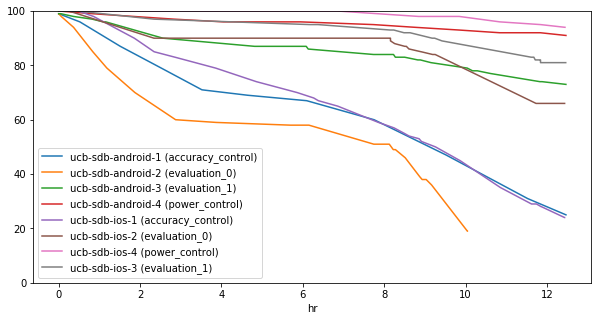

In [17]:
ifig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))
for phone_os, df_map in pv_dfs.items():
    battery_df = df_map["battery_df"]
    for i, phone_label in enumerate(battery_df["phone_label"].unique()):
        third_rep = battery_df.query(
            f"phone_label == '{phone_label}' and range_type == 'evaluation' and range_index == 2")
        role = third_rep["role"].unique()[0]
        third_rep.plot(ax=ax, x="hr", y="battery_level_pct", label=f"{phone_label} ({role})", ylim=(0, 100))

### Work with a single leg

You can also work with the details of a single leg. This is not likely to be useful for power estimates because there are so few points, but it is going to be easier to work with trajectory estimates

In [18]:
bart_leg = pv_dfs["ios"]["location_df"].query(
    "phone_label == 'ucb-sdb-ios-1'"
    "and range_type == 'evaluation'"
    "and range_index == 2"
    "and trip_range_index == 0"
    "and section_range_index == 5"
)

bart_leg

,filter,floor,longitude,sensed_speed,ts,bearing,latitude,vaccuracy,fmt_time,accuracy,...,trip_range_gt_end_ts,trip_range_gt_duration,trip_range_index,section_range_id,section_range_id_base,section_range_run,section_range_gt_start_ts,section_range_gt_end_ts,section_range_gt_duration,section_range_index
50614,distance,0.0,-122.387030,-1.0,1.564158e+09,-1.0,37.600423,25.195843,2019-07-26T09:19:57-0700,160.172549,...,1.564162e+09,8230.586782,0.0,subway_underground_0,subway_underground,0.0,1.564158e+09,1.564161e+09,3237.071573,5.0
50625,distance,0.0,-122.396691,-1.0,1.564158e+09,-1.0,37.612530,25.195843,2019-07-26T09:20:59-0700,4000.000000,...,1.564162e+09,8230.586782,0.0,subway_underground_0,subway_underground,0.0,1.564158e+09,1.564161e+09,3237.071573,5.0
50630,distance,0.0,-122.397689,-1.0,1.564158e+09,-1.0,37.614372,25.195843,2019-07-26T09:21:08-0700,4013.390370,...,1.564162e+09,8230.586782,0.0,subway_underground_0,subway_underground,0.0,1.564158e+09,1.564161e+09,3237.071573,5.0
50631,distance,0.0,-122.398481,-1.0,1.564158e+09,-1.0,37.615888,25.195843,2019-07-26T09:21:08-0700,4013.390498,...,1.564162e+09,8230.586782,0.0,subway_underground_0,subway_underground,0.0,1.564158e+09,1.564161e+09,3237.071573,5.0
50632,distance,0.0,-122.399183,-1.0,1.564158e+09,-1.0,37.617229,25.195843,2019-07-26T09:21:09-0700,4013.402705,...,1.564162e+09,8230.586782,0.0,subway_underground_0,subway_underground,0.0,1.564158e+09,1.564161e+09,3237.071573,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52180,distance,0.0,-122.272605,-1.0,1.564161e+09,-1.0,37.861351,13.867517,2019-07-26T10:13:12-0700,3000.000000,...,1.564162e+09,8230.586782,0.0,subway_underground_0,subway_underground,0.0,1.564158e+09,1.564161e+09,3237.071573,5.0
52183,distance,0.0,-122.268205,-1.0,1.564161e+09,-1.0,37.870067,10.000000,2019-07-26T10:13:38-0700,165.000000,...,1.564162e+09,8230.586782,0.0,subway_underground_0,subway_underground,0.0,1.564158e+09,1.564161e+09,3237.071573,5.0
52184,distance,0.0,-122.268199,-1.0,1.564161e+09,-1.0,37.870080,10.000000,2019-07-26T10:13:38-0700,165.000000,...,1.564162e+09,8230.586782,0.0,subway_underground_0,subway_underground,0.0,1.564158e+09,1.564161e+09,3237.071573,5.0
52185,distance,0.0,-122.268194,-1.0,1.564161e+09,-1.0,37.870090,10.000000,2019-07-26T10:13:38-0700,165.000000,...,1.564162e+09,8230.586782,0.0,subway_underground_0,subway_underground,0.0,1.564158e+09,1.564161e+09,3237.071573,5.0


In [19]:
gt_subset = ["trip_range_id_base", "section_range_id_base", "section_range_gt_start_ts", "section_range_gt_end_ts"]

tr_id_base, sr_id_base, gt_start_ts, gt_end_ts = tuple(bart_leg[gt_subset].drop_duplicates().iloc[0].values)

gt_leg = sd.get_ground_truth_for_leg(tr_id_base, sr_id_base, gt_start_ts, gt_end_ts)

gt_leg

{'id': 'subway_underground',
 'name': 'BART from Millbrae to Berkeley',
 'mode': 'SUBWAY',
 'multiple_occupancy': True,
 'start_loc': {'type': 'Feature',
  'properties': {'name': 'Millbrae Intermodal Terminal',
   'valid_start_fmt_date': '2019-07-16',
   'valid_start_ts': 1563235200,
   'valid_end_fmt_date': '2020-04-30',
   'valid_end_ts': 1588204800},
  'geometry': {'type': 'Polygon',
   'coordinates': [[[-122.38777041435242, 37.600819226835206],
     [-122.38625496625899, 37.59932104231882],
     [-122.38589286804198, 37.59953992789595],
     [-122.38743782043457, 37.601008357203966],
     [-122.38777041435242, 37.600819226835206]]]}},
 'end_loc': {'type': 'Feature',
  'properties': {'name': 'Downtown Berkeley BART',
   'valid_start_fmt_date': '2019-07-16',
   'valid_start_ts': 1563235200,
   'valid_end_fmt_date': '2020-04-30',
   'valid_end_ts': 1588204800},
  'geometry': {'type': 'Polygon',
   'coordinates': [[[-122.26870179176329, 37.871262515520044],
     [-122.26839065551758, 3

#### Display the leg

Note the layer control on the map that allows you to toggle the lines separately

In [20]:
curr_map = folium.Map()
gt_leg_gj = sd.get_geojson_for_leg(gt_leg)
sensed_section_gj = ezgj.get_geojson_for_loc_df(bart_leg)
gt_leg_gj_feature = folium.GeoJson(gt_leg_gj, name="ground_truth")
sensed_leg_gj_feature = folium.GeoJson(sensed_section_gj, name="sensed_values")
curr_map.add_child(gt_leg_gj_feature)
curr_map.add_child(sensed_leg_gj_feature)
curr_map.fit_bounds(sensed_leg_gj_feature.get_bounds())
folium.LayerControl().add_to(curr_map)
curr_map

#### Display the leg with points

In this case, the points are in a separate layer so they can be toggled indepdendently of the underlying lines

In [21]:
curr_map = folium.Map()
gt_leg_gj = sd.get_geojson_for_leg(gt_leg)
sensed_section_gj = ezgj.get_geojson_for_loc_df(bart_leg)
gt_leg_gj_feature = folium.GeoJson(gt_leg_gj, name="ground_truth")
gt_leg_gj_points = ezgj.get_point_markers(gt_leg_gj[2], name="ground_truth_points", color="green")
sensed_leg_gj_feature = folium.GeoJson(sensed_section_gj, name="sensed_values")
sensed_leg_gj_points = ezgj.get_point_markers(sensed_section_gj, name="sensed_points", color="red")
curr_map.add_child(gt_leg_gj_feature)
curr_map.add_child(gt_leg_gj_points)
curr_map.add_child(sensed_leg_gj_feature)
curr_map.add_child(sensed_leg_gj_points)
curr_map.fit_bounds(sensed_leg_gj_feature.get_bounds())
folium.LayerControl().add_to(curr_map)
curr_map